In [108]:
#import appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import the csv file, this data was pulled from a kaggle dataset by spreadspoke
#https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data
df = pd.read_csv('nfl_betting.csv', parse_dates = [0])

#import csv file of offensive stats pulled from nfl.com
df_offense = pd.read_csv('nfl_offense.csv')

#import csv file of scoring stats pulled from nfl.com
df_scoring = pd.read_csv('nfl_scoring.csv', header = 1)



In [76]:
#Find the average, variance, and standard devistion of the  points per game (Pts/G) column over the full data set
pts_g_avg = df_offense['Pts/G'].mean()
pts_g_var = df_offense['Pts/G'].var()
pts_g_std = df_offense['Pts/G'].std()

#print out the values with only 2 decimal points
print('mean =',"%.2f"% pts_g_avg,', variance =',"%.2f"% pts_g_var, ', standard dev =',"%.2f"% pts_g_std)

mean = 22.38 , variance = 19.51 , standard dev = 4.42


In [112]:
#Find the average, variance, and standard dev of each row by year
offense_avg = df_offense.groupby(['Rk']).mean()
offense_var = df_offense.groupby(['Rk']).var()
offense_std = df_offense.groupby(['Rk']).std()
offense_std['Pts/G']

Rk
2008    4.171687
2009    5.045391
2010    4.018967
2011    5.493071
2012    4.641606
2013    4.369007
2014    4.431202
2015    3.799215
2016    4.131425
2017    4.076742
Name: Pts/G, dtype: float64

<IPython.core.display.Javascript object>


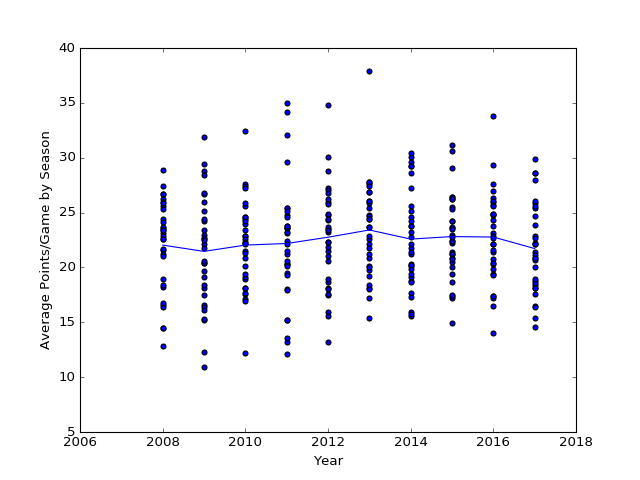

In [110]:
#create a scatter plot that shows each teams average Points per game / season
%matplotlib notebook
plt.scatter(df_offense['Rk'],df_offense['Pts/G'])
plt.xlabel('Year')
plt.ylabel('Average Points/Game by Season')
#Create a data frame for each year in the data, trying to use same method above
    #causes an error b/c there are more rows in Rk
years = pd.DataFrame([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,2016,2017])
#plot the avg points per season
plt.plot(years,offense_avg['Pts/G'])

In [113]:
df.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'team_home',
       'team_away', 'stadium', 'team_favorite_id', 'spread_favorite',
       'over_under_line', 'weather_detail', 'weather_temperature',
       'weather_wind_mph', 'weather_humidity', 'score_home', 'score_away',
       'stadium_neutral', 'schedule_playoff', 'game_id'],
      dtype='object')

In [118]:
#Add a total points column to match to the over_under column
df['total points'] = df['score_home']+df['score_away']

In [122]:
# mean, variance, and standard dev of the betting info
df_avg = df.groupby(['schedule_season']).mean()
df_var = df.groupby(['schedule_season']).var()
df_std = df.groupby(['schedule_season']).std()

In [ ]:
#create dataframe with games that excludes 2018 season
df_history = df[df['schedule_season']<=2017]
df_history.head()

In [ ]:
df_present = df[(df['schedule_season']>=2016) & (df['schedule_season']<=2017)]